<a href="https://colab.research.google.com/github/dev-S-t/Fraud_Detection/blob/main/Clutch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> # **DATA INFO**

#### The data is broken into **two files identity and transaction,** which are **joined by TransactionID**. Not all transactions have corresponding identity information.
https://www.kaggle.com/c/ieee-fraud-detection/data?select=test_transaction.csv




>> ### **Categorical Features - Transaction**



>>>* ProductCD
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9


>> ### **Categorical Features - Identity**


>>> * DeviceType
* DeviceInfo
* id_12 - id_38



> ### **Transaction Table**

>> * TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
* TransactionAMT: transaction payment amount in USD
* ProductCD: product code, the product for each transaction
* card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.         
`(card4 = card issuer name and card6 = debit or credit)`
* addr: address
* dist: distance
* P_ and (R__) emaildomain: purchaser and recipient email domain
* C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
* D1-D15: timedelta, such as days between previous transaction, etc.
* M1-M9: match, such as names on card and address, etc.
* Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.


> ### **Identity Table**


>> * Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
* They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)



> # Loading Data

In [ ]:
# sample_df = pd.read_csv("/content/drive/MyDrive/ieee-fraud-detection/sample_submission.csv")
# test_id = pd.read_csv("/content/drive/MyDrive/ieee-fraud-detection/test_identity.csv")
# test_transaction = pd.read_csv("/content/drive/MyDrive/ieee-fraud-detection/test_transaction.csv")
train_id = pd.read_csv("/content/drive/MyDrive/ieee-fraud-detection/train_identity.csv")
train_transaction = pd.read_csv("/content/drive/MyDrive/ieee-fraud-detection/train_transaction.csv")

In [ ]:
# Merge datasets
train = train_transaction.merge(train_id, on='TransactionID', how='left')

In [ ]:
del train_id
del train_transaction

In [7]:
threshold = 50
cols_to_drop = missing_df[missing_df['missing_percentage'] > threshold]['column_name']
train.drop(cols_to_drop, axis=1, inplace=True)


In [9]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,590528.000000,589271.000000,589271.000000,589271.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000,590528.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,39.173910,21.351473,43.319174,26.806977,109.818544,247.606741,162.153398,18.372476,42.073133,28.326584
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,172.128339,95.902970,173.619028,116.853222,2270.033202,3980.042828,2793.343636,332.304848,473.499307,382.053171
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55125.000000,4817.470215,7519.870117,4817.470215,93736.000000,134021.000000,98476.000000,104060.000000,104060.000000,104060.000000


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 220 entries, TransactionID to V321
dtypes: float64(207), int64(4), object(9)
memory usage: 991.2+ MB


In [13]:
## Memory Reducer
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [14]:
train= reduce_mem_usage(train)

Mem. usage decreased to 300.18 Mb (69.7% reduction)


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 220 entries, TransactionID to V321
dtypes: float16(189), float32(18), int16(1), int32(2), int8(1), object(9)
memory usage: 300.2+ MB


In [17]:
train.sort_values(by='TransactionDT' , inplace=True)
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


>Missing


In [ ]:
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100
missing_df = pd.DataFrame({'column_name': train.columns, 'missing_percentage': missing_percentage})
missing_df.sort_values(by='missing_percentage', ascending=False, inplace=True)
missing_df.head()

,column_name,missing_percentage
id_24,id_24,99.196159
id_25,id_25,99.130965
id_07,id_07,99.127070
id_08,id_08,99.127070
id_21,id_21,99.126393


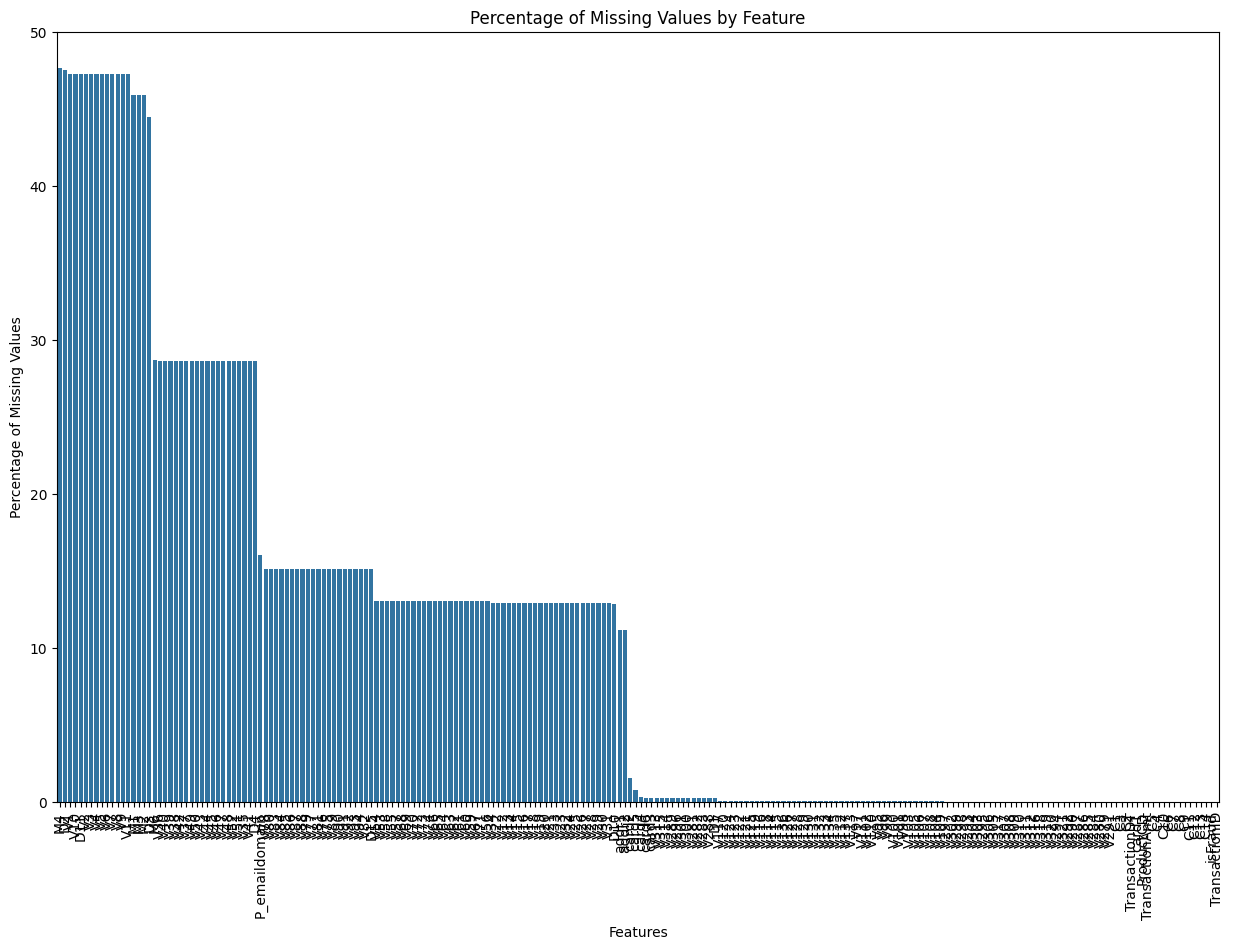

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.barplot(x=missing_df['column_name'], y=missing_df['missing_percentage'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values by Feature')
plt.show()


In [ ]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 1)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df , end="\n")
    if na_name:
        return na_columns

missing_values_table(test_df, na_name=False)

In [10]:
import pandas as pd

# Calculate missing values
missing_values = train.isnull().sum()
missing_percentage = (missing_values / len(train)) * 100

# Create a DataFrame for missing values
missing_df = pd.DataFrame({'column_name': train.columns, 'missing_percentage': missing_percentage})
missing_df.sort_values(by='missing_percentage', ascending=False, inplace=True)

# Display columns with their missing percentage
print(missing_df)


                 column_name  missing_percentage
M4                        M4           47.658753
D2                        D2           47.549192
V1                        V1           47.293494
V10                      V10           47.293494
D11                      D11           47.293494
...                      ...                 ...
C12                      C12            0.000000
C13                      C13            0.000000
C14                      C14            0.000000
isFraud              isFraud            0.000000
TransactionID  TransactionID            0.000000

[220 rows x 2 columns]
